# Trabalho 2 - Python + MongoDB
-----
O objetivo deste trabalho é exercitar a utilização de banco de dados noSQL e manipulação de dados em Python. O dataset que será utilizado é o dataset de Comunicação de Acidentes do Trabalho, disponível no portal de dados aberto do Brasil: http://dados.gov.br
O dataset original completo é composto por 3 trimestres de comunicação de acidentes de trabalho (Jul-Set 2018, Out-Dez 2018 e Jan-Mar 2019). Cada dupla, em sua área Oracle, tem acesso a um recorte deste dataset, com até 29.000 instâncias, aproximadamente. Além disso, o dataset foi enriquecido com dados de populações das respectivas cidades dos correspondentes empregadores (não, não tem a cidade onde ocorreu o acidente de trabalho; somente o estado).

Abaixo, você encontra o passo a passo que deve ser seguido para realização do trabalho.


## 1 - Exportar os dados do Oracle
Você deve construir uma consulta que faça a junção entre os acidentes de trabalho disponíveis ao grupo e as populações dos municípios que aparecem no dataset, e exportar o resultados para `csv`. Ao exportar, definir delimitadores para não numéricos (", por exemplo) e a codificação adequada ('cp1252' é adequada).


## 2 - Ler o dataset e inserir no MongoDB

Você deve ler o dataset exportado no passo anterior, transformar os dados em formato de documento e fazer upload para a coleção do seu grupo no mongoDB. O nome da coleção é `dupla_x_collection`. O seu usário do MongoDB é `dupla_x`. A senha você deve ter recebido no moodle. Caso não saiba a sua senha de acesso, pergunte aos professores. **x** é o número da sua dupla! 

Para conectar no MongoDB a partir do python, você pode utilizar o código abaixo:

```python
from pymongo import MongoClient
user = 'dupla_x' # coloque o número da sua dupla aqui!
pwd = 'senhaDaSuaDupla' # coloque a senha da sua dupla aqui!
client = MongoClient('mongodb://{}:{}@ds151066.mlab.com:51066/datascience'.format(user, pwd))
db = client.datascience

# exemplo de consulta de documentos
cursor = db.dupla_x_collection.find() # x é o numero da sua dupla!!
```
O espaço alocado no MongoDB (MLAB), para cada grupo, é suficiente para a carga do `csv`. 


## 2 - Responder as seguintes perguntas utilizando consultas ao MongoDB

A dupla deve responder as seguintes perguntas, utilizando apenas consultas ao banco de dados.

1. Quais os 10 municípios com maior taxa de acidentes por 100 mil habitantes?
2. Quais as Naturezas das lesões, e correspondentes números de acidentes de trabalho, para naturezas de lesões cujo número de acidentes de trabalho é > 100?
3. Quais os agentes causadores de acidentes, e correspondentes números de acidentes, por mês-ano e para acidentes com óbitos, onde o número de óbitos por agente causador é > 2?

Dica: usem aggregate da API do MongoDB. Vejam mais informações em: 
https://docs.mongodb.com/manual/reference/method/db.collection.aggregate/
e
https://docs.mongodb.com/manual/reference/operator/aggregation-pipeline/


## 3 - Responder as seguintes perguntas utilizando Python (Pandas, Numpy e Matplotlib)

1. Quais os 10 municípios que mais possuem acidentes de trabalho? Faça um gráfico de barras para apresentar o resultado.
2. Quais os 10 municípios que mais possuem acidentes de trabalho por 100 mil habitantes? Faça um gráfico de barras para apresentar o resultado.
3. Qual a proporção de acidentes de trabalho em relação a cada estado? Faça um gráfico de pizza para mostrar o resultado.
4. Qual a natureza da lesão mais comum nos acidentes?
5. Qual é o comportamento do número de acidentes ao longo do tempo? Mostre a evolução do número de acientes utilizando um gráfico de linha.
 


## Entrega
A dupla deve entregar, **no moodle da disciplina de Banco de Dados Relacionais e Não Relacionais**, um **arquivo zip** com o seguinte nome: `dupla_x.zip`, onde **x** é o número da sua dupla. O arquivo `zip` deve conter os seguintes arquivos:
* Um relatório em `pdf` contendo a definição da visão definida no Oracle, e os resultados obtidos nas consultas sobre o MongoDB via MLAB.
* Este jupyter notebook contendo o código desenvolvido pela dupla.
* O dataset em `csv` exportado do Oracle.

<h3 style='color:red'>IMPORTANTE: A data de entrega do trabalho é 23/05.</h3>


## Critérios de avaliação

#### Critérios de avaliação da disciplina de Banco de Dados Relacionais e Não Relacionais
- Visão adequada para exportação, contendo a junção do recorte de dados de acidentes de trabalho e as populações dos municípios: 15%
- Arquivo `csv` exportado, com o conteúdo adequado: 10%
- Resolução das consultas propostas: 75% (25% para cada uma)


#### Critérios de avaliação da disciplina de Python Para Ciência de Dados
A nota deste trabalho equivale ao **Trabalho 2 (T2)** da disciplinina de de Python Para Ciência de Dados. A pontuação será calculada sobre as questões mostradas no **item 3**, cada questão vale **2 pontos** e será avaliada de acordo com os seguintes critérios:

- Resolver o problema proposto: 70%
- Utilizar código vetorizado: 20%
- Escrever código simples e legível: 10%

### O seu código deve ser escrito nas células abaixo. Crie novas células conforme a necesidade de abstração. Evite escrever o código inteiro em uma única célula.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymongo
from pymongo import MongoClient
from IPython.display import display as print_dataframe
import json




# Respostas MongoDB

In [3]:
user = 'dupla_9' 
pwd = 'topy0ec5'
client = MongoClient('mongodb://{}:{}@ds151066.mlab.com:51066/datascience'.format(user, pwd))
db = client.datascience

#db.dupla_9_collection.delete_many({}) # deleta todos 
#db.dupla_9_collection.insert_many(df_dict) # insere todos
#cursor = db.dupla_9_collection.find() # consulta
#db.dupla_9_collection.insert_many([{'x': i} for i in range(2)]) # insere

'''
total = db.dupla_9_collection.count_documents({})
if(total==0):
    try:
        db.dupla_9_collection.insert_many(df_dict, ordered=False)
    except pymongo.errors.BulkWriteError as e:
        print(e.details)
'''
db.dupla_9_collection.count_documents({}) 

26628

### 1 - Quais os 10 municípios com maior taxa de acidentes por 100 mil habitantes?


In [4]:
cursor = db.dupla_9_collection

In [74]:
ac_munic = cursor.aggregate([
    {'$group': {'_id': {'Município': '$NOME_MUN', 'pop': '$POUPLACAO'}, 'count': {'$sum': 1} } },
    {'$project': {'div': {'$divide': ['$count', '$_id.pop'] } } },
    {'$project': {'Taxa': {'$multiply': ['$div', 100000] } } },
    {'$sort': {'Taxa': -1} },
    {'$limit': 10},
    {'$project': {'_id.Município': 1, 'Taxa': 1} }
])
#display(list(ac_munic))
a = list(ac_munic)
for i in a:
    print(str(i['_id']).replace('{', '').replace('}', '').replace('\'', ''), '  -  Taxa: ', i['Taxa'])

# https://docs.mongodb.com/manual/reference/operator/aggregation/divide/
# https://docs.mongodb.com/manual/reference/operator/aggregation/multiply/

Município: Borá   -  Taxa:  598.0861244019138
Município: Cosmorama   -  Taxa:  300.7107709130672
Município: Mendonça   -  Taxa:  258.63661555514506
Município: Onda Verde   -  Taxa:  253.51463470845817
Município: Pontes Gestal   -  Taxa:  232.8288707799767
Município: Suzanápolis   -  Taxa:  230.12017386857582
Município: Vista Alegre do Alto   -  Taxa:  208.67145838163694
Município: Gavião Peixoto   -  Taxa:  188.99622007559847
Município: Ipiguá   -  Taxa:  188.46588767433096
Município: Cedral   -  Taxa:  186.3013698630137


{'_id': ObjectId('5cdf542de43df11ba4b62f0c'), 
 'MES_ANO_ACIDENTE': '01-JUL-18', 
 'NATUREZA_DA_LESAO': 'Fratura', 
 'AGENTE_CAUSADOR_ACIDENTE': 'Escada Movel ou Fixa', 
 'INDICA_OBITO_ACIDENTE': 'Não', 
 'POUPLACAO': 1365899, 
 'NOME_MUN': 'Guarulhos', 
 'NOME_UF': 'São Paulo'}




### 2 - Quais as Naturezas das lesões, e correspondentes números de acidentes de trabalho, para naturezas de lesões cujo número de acidentes de trabalho é > 100?


In [172]:
# numero de acidentes são as quantidades de lesoes
ac_lesao = cursor.aggregate([
    {'$group': {'_id': {'lesao': '$NATUREZA_DA_LESAO'}, 'count': {'$sum': 1} } },
    {'$match': {'count': {'$gt': 100} } },
    {'$sort': {'count': -1} }
] )
# ja mostra ordenado
#display(list(ac_lesao))

### 3- Quais os agentes causadores de acidentes, e correspondentes números de acidentes, por mês-ano e para acidentes com óbitos, onde o número de óbitos por agente causador é > 2?

In [ ]:
{'_id': ObjectId('5cdf542de43df11ba4b62f0c'), 
 'MES_ANO_ACIDENTE': '01-JUL-18', 
 'NATUREZA_DA_LESAO': 'Fratura', 
 'AGENTE_CAUSADOR_ACIDENTE': 'Escada Movel ou Fixa', 
 'INDICA_OBITO_ACIDENTE': 'Não', 
 'POUPLACAO': 1365899, 
 'NOME_MUN': 'Guarulhos', 
 'NOME_UF': 'São Paulo'}

SELECT AGENTE_CAUSADOR_ACIDENTE, MES_ANO_ACIDENTE,  COUNT(*) "NUMERO_ACIDENTES"
FROM DUNCANBDA.ACID_TRAB_2018JUL_2019MAR_9 
GROUP BY MES_ANO_ACIDENTE, AGENTE_CAUSADOR_ACIDENTE, MES_ANO_ACIDENTE, INDICA_OBITO_ACIDENTE
HAVING INDICA_OBITO_ACIDENTE = 'Sim' and (COUNT(*)> 2);

In [37]:

ag_lesao = cursor.aggregate([
    {'$group': {'_id': {'data': '$MES_ANO_ACIDENTE', 'causa': '$AGENTE_CAUSADOR_ACIDENTE', 'obito': '$INDICA_OBITO_ACIDENTE'},
    'count': {'$sum': 1} } },
    {'$match': {'$and': [ {'count': {'$gt': 2} }, {'_id.obito': {'$eq': 'Sim'} } ] } } 
])
 
display(list(ag_lesao))

[{'_id': {'data': '01-JAN-19',
   'causa': 'Veiculo Rodoviario M',
   'obito': 'Sim'},
  'count': 5},
 {'_id': {'data': '01-AUG-18',
   'causa': 'Motocicleta, Motonet',
   'obito': 'Sim'},
  'count': 4},
 {'_id': {'data': '01-OCT-18',
   'causa': 'Veiculo Rodoviario M',
   'obito': 'Sim'},
  'count': 4},
 {'_id': {'data': '01-AUG-18',
   'causa': 'Veiculo Rodoviario M',
   'obito': 'Sim'},
  'count': 3},
 {'_id': {'data': '01-OCT-18', 'causa': 'Veiculo, Nic', 'obito': 'Sim'},
  'count': 4},
 {'_id': {'data': '01-NOV-18', 'causa': 'Veiculo, Nic', 'obito': 'Sim'},
  'count': 3},
 {'_id': {'data': '01-FEB-19',
   'causa': 'Motocicleta, Motonet',
   'obito': 'Sim'},
  'count': 3}]

In [107]:
ag_lesao = cursor.aggregate([
    {'$match': {'INDICA_OBITO_ACIDENTE': {'$eq':'Sim'} } },
    {'$group': {'_id': {'causa': "$AGENTE_CAUSADOR_ACIDENTE", 'data': "$MES_ANO_ACIDENTE"}, 'count': {'$sum': 1} } },
    {'$match': {'count': {'$gt': 2} } },
    {'$sort': {'count': -1} }
] )
# organiza decrescentemente
display(list(ag_lesao))

[{'_id': {'causa': 'Veiculo Rodoviario M', 'data': '01-JAN-19'}, 'count': 5},
 {'_id': {'causa': 'Motocicleta, Motonet', 'data': '01-AUG-18'}, 'count': 4},
 {'_id': {'causa': 'Veiculo Rodoviario M', 'data': '01-OCT-18'}, 'count': 4},
 {'_id': {'causa': 'Veiculo, Nic', 'data': '01-OCT-18'}, 'count': 4},
 {'_id': {'causa': 'Veiculo, Nic', 'data': '01-NOV-18'}, 'count': 3},
 {'_id': {'causa': 'Veiculo Rodoviario M', 'data': '01-AUG-18'}, 'count': 3},
 {'_id': {'causa': 'Motocicleta, Motonet', 'data': '01-FEB-19'}, 'count': 3}]

In [ ]:
df = pd.read_csv('data_acid.csv', header = 0 ,encoding = "CP1252", sep=",", index_col=False)
print_dataframe(df.head(8))
df_dict = df.to_dict('records')
print_dataframe(df_dict[:5])

São Paulo                7353
Guarulhos                 796
Campinas                  742
Ribeirão Preto            579
São Bernardo do Campo     553
São José do Rio Preto     530
Piracicaba                496
Santo André               483
Jundiaí                   463
Barueri                   408
Name: NOME_MUN, dtype: int64

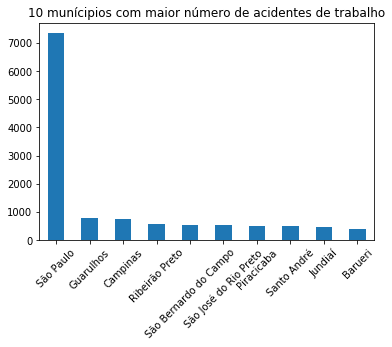

In [66]:
##1.Quais os 10 municípios que mais possuem acidentes de trabalho? Faça um gráfico de barras para apresentar o resultado.
acid_count = df['NOME_MUN'].value_counts(sort=True, ascending=False)[:10]
print_dataframe(acid_count)
acid_count.plot.bar()
plt.title('10 munícipios com maior número de acidentes de trabalho')
plt.xticks(rotation=45)
plt.show()

In [5]:
##2.Quais os 10 municípios que mais possuem acidentes de trabalho por 100 mil habitantes? 
##Faça um gráfico de barras para apresentar o resultado.
##df_grouped_by_acid2 = df.groupby(['NOME_MUN', 'POPULAÇÃO'])
acid_por_100mil = ((df['NOME_MUN'].value_counts(sort=True, ascending=False))*100000)[:10]

print_dataframe(acid_por_100mil)



São Paulo                735300000
Guarulhos                 79600000
Campinas                  74200000
Ribeirão Preto            57900000
São Bernardo do Campo     55300000
São José do Rio Preto     53000000
Piracicaba                49600000
Santo André               48300000
Jundiaí                   46300000
Barueri                   40800000
Name: NOME_MUN, dtype: int64

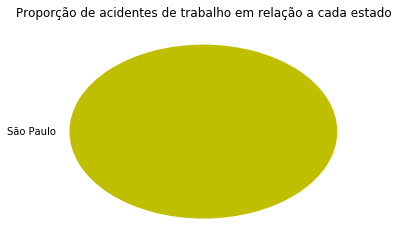

In [6]:
##3.Qual a proporção de acidentes de trabalho em relação a cada estado?
##Faça um gráfico de pizza para mostrar o resultado.
acid_count = df['NOME_UF'].value_counts(sort=True, ascending=False)
##print_dataframe(acid_count)
acid_count.plot.pie(colors = 'yellow')
plt.ylabel('')
plt.title('Proporção de acidentes de trabalho em relação a cada estado')
plt.show()

In [67]:
##4.Qual a natureza da lesão mais comum nos acidentes?
nat_lesao = (df['NATUREZA_DA_LESAO'].value_counts(sort=True, ascending=False)).idxmax()
nat_lesao_count = (df['NATUREZA_DA_LESAO'].value_counts(sort=True, ascending=False)).max()
print('A natureza da lesão mais frequente é: {}, com {} acidentes.'.format(nat_lesao,nat_lesao_count))



A natureza da lesão mais frequente é: Corte, Laceracao, Fe, com 5715 acidentes.


01-AUG-18    3501
01-OCT-18    3377
01-JAN-19    3083
01-JUL-18    3016
01-FEB-19    2907
01-SEP-18    2890
01-NOV-18    2673
01-MAR-19    2368
01-DEC-18    2079
01-JUN-18     514
01-MAY-18      81
01-MAR-18      50
01-APR-18      47
01-FEB-18      22
01-JAN-18      20
Name: MES_ANO_ACIDENTE, dtype: int64

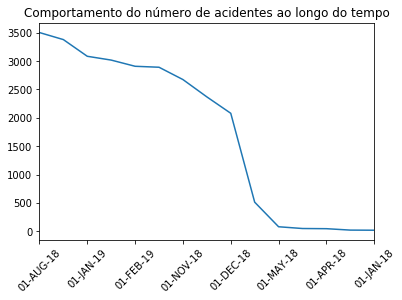

In [71]:
##5.Qual é o comportamento do número de acidentes ao longo do tempo?
##Mostre a evolução do número de acientes utilizando um gráfico de linha.
acid_count = df['MES_ANO_ACIDENTE'].value_counts()
print_dataframe(acid_count)
acid_count.plot()
plt.title('Comportamento do número de acidentes ao longo do tempo')
plt.xticks(rotation=45)
plt.show()